In [1]:
%matplotlib inline

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import io

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../data"]).decode("utf8"))

# load files
training_data = pd.read_csv("../data/train.csv", encoding="ISO-8859-1")
testing_data = pd.read_csv("../data/test.csv", encoding="ISO-8859-1")
attribute_data = pd.read_csv("../data/attributes.csv")
descriptions = pd.read_csv("../data/product_descriptions.csv")

# merge descriptions
training_data = pd.merge(training_data, descriptions, on="product_uid", how="left")

# merge product counts
product_counts = pd.DataFrame(pd.Series(training_data.groupby(["product_uid"]).size(), name="product_count"))
training_data = pd.merge(training_data, product_counts, left_on="product_uid", right_index=True, how="left")

# merge brand names
brand_names = attribute_data[attribute_data.name == "MFG Brand Name"][["product_uid", "value"]].rename(columns={"value": "brand_name"})
training_data = pd.merge(training_data, brand_names, on="product_uid", how="left")
training_data.brand_name.fillna("Unknown", inplace=True)

attributes.csv
attributes_play.csv
product_descriptions.csv
product_descriptions_play.csv
sample_submission.csv
solution.csv
test.csv
test_play.csv
train.csv
train_play.csv



In [3]:
print(str(training_data.info()))
print(str(training_data.describe()))
training_data[:50]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74067 entries, 0 to 74066
Data columns (total 8 columns):
id                     74067 non-null int64
product_uid            74067 non-null int64
product_title          74067 non-null object
search_term            74067 non-null object
relevance              74067 non-null float64
product_description    74067 non-null object
product_count          74067 non-null int64
brand_name             74067 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 5.1+ MB
None
                  id    product_uid     relevance  product_count
count   74067.000000   74067.000000  74067.000000   74067.000000
mean   112385.709223  142331.911553      2.381634       1.935450
std     64016.573650   30770.774864      0.533984       1.706594
min         2.000000  100001.000000      1.000000       1.000000
25%     57163.500000  115128.500000      2.000000       1.000000
50%    113228.000000  137334.000000      2.330000       1.000000
75%    16827

,id,product_uid,product_title,search_term,relevance,product_description,product_count,brand_name
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,"Not only do angles make joints stronger, they ...",2,Simpson Strong-Tie
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50,"Not only do angles make joints stronger, they ...",2,Simpson Strong-Tie
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00,BEHR Premium Textured DECKOVER is an innovativ...,1,BEHR Premium Textured DeckOver
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33,Update your bathroom with the Delta Vero Singl...,2,Delta
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67,Update your bathroom with the Delta Vero Singl...,2,Delta
5,18,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,convection otr,3.00,Achieving delicious results is almost effortle...,3,Whirlpool
6,20,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,microwave over stove,2.67,Achieving delicious results is almost effortle...,3,Whirlpool
7,21,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,microwaves,3.00,Achieving delicious results is almost effortle...,3,Whirlpool
8,23,100007,Lithonia Lighting Quantum 2-Light Black LED Em...,emergency light,2.67,The Quantum Adjustable 2-Light LED Black Emerg...,1,Lithonia Lighting
9,27,100009,House of Fara 3/4 in. x 3 in. x 8 ft. MDF Flut...,mdf 3/4,3.00,Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...,1,House of Fara


In [4]:
print(attribute_data.name.value_counts())
print(attribute_data.value[attribute_data.name == "Indoor/Outdoor"].value_counts())

MFG Brand Name                          86250
Bullet02                                86248
Bullet03                                86226
Bullet04                                86174
Bullet01                                85940
Product Width (in.)                     61137
Bullet05                                60529
Product Height (in.)                    54698
Product Depth (in.)                     53652
Product Weight (lb.)                    45175
Bullet06                                44901
Color Family                            41508
Bullet07                                34349
Material                                31500
Color/Finish                            28564
Bullet08                                26645
Certifications and Listings             24583
Bullet09                                20567
Assembled Height (in.)                  18299
Assembled Width (in.)                   18263
Assembled Depth (in.)                   18198
Product Length (in.)              

In [5]:
training_data["id_bins"] = pd.cut(training_data.id, 20, labels=False)
print(training_data.corr(method="spearman"))
training_data.describe()

                     id  product_uid  relevance  product_count   id_bins
id             1.000000     1.000000  -0.126681      -0.484873  0.998746
product_uid    1.000000     1.000000  -0.126681      -0.484873  0.998746
relevance     -0.126681    -0.126681   1.000000      -0.026358 -0.126639
product_count -0.484873    -0.484873  -0.026358       1.000000 -0.484009
id_bins        0.998746     0.998746  -0.126639      -0.484009  1.000000


,id,product_uid,relevance,product_count,id_bins
count,74067.000000,74067.000000,74067.000000,74067.000000,74067.000000
mean,112385.709223,142331.911553,2.381634,1.935450,9.648764
std,64016.573650,30770.774864,0.533984,1.706594,5.773127
min,2.000000,100001.000000,1.000000,1.000000,0.000000
25%,57163.500000,115128.500000,2.000000,1.000000,5.000000
50%,113228.000000,137334.000000,2.330000,1.000000,10.000000
75%,168275.500000,166883.500000,3.000000,2.000000,15.000000
max,221473.000000,206650.000000,3.000000,21.000000,19.000000


3.00    19125
2.33    16060
2.67    15202
2.00    11730
1.67     6780
1.33     3006
1.00     2105
2.50       19
2.25       11
2.75       11
1.75        9
1.50        5
1.25        4
Name: relevance, dtype: int64

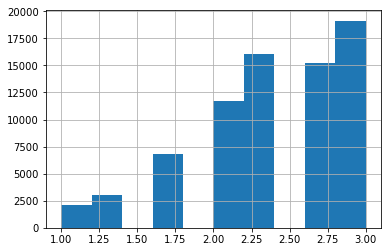

In [6]:
training_data.relevance.hist()
training_data.relevance.value_counts()

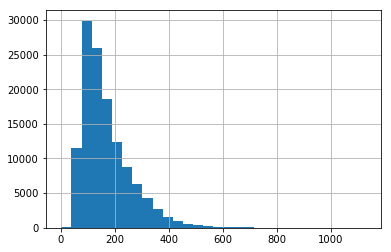

In [7]:
(descriptions.product_description.str.len() / 5).hist(bins=30)

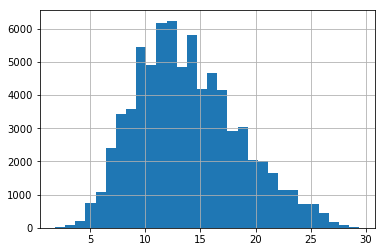

In [8]:
(training_data.product_title.str.len() / 5).hist(bins=30)

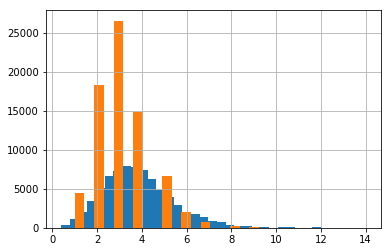

In [9]:
(training_data.search_term.str.len() / 5.).hist(bins=30)
(training_data.search_term.str.count("\\s+") + 1).hist(bins=30)

In [10]:
testing_data.product_uid.value_counts()

101892    52
101280    35
101442    35
101148    34
102456    31
100898    31
102162    30
104691    27
109594    27
101959    26
102235    26
102954    26
101312    26
101024    25
105369    25
102567    25
100941    24
104899    24
100065    24
100526    24
103763    24
101027    23
112119    22
118371    22
102304    22
117268    22
102891    22
100409    22
100885    22
101272    22
          ..
192787     1
182548     1
180501     1
186646     1
174360     1
178458     1
170270     1
168223     1
223520     1
221473     1
143627     1
141576     1
215204     1
147717     1
213157     1
219302     1
217255     1
207016     1
204969     1
211114     1
209067     1
196781     1
125168     1
116980     1
114933     1
119031     1
112890     1
110843     1
162050     1
110474     1
Name: product_uid, dtype: int64

In [11]:
training_products = training_data.product_uid.value_counts()
testing_products = testing_data.product_uid.value_counts()
training_norm = np.sqrt((training_products ** 2).sum())
testing_norm = np.sqrt((testing_products ** 2).sum())
product_uid_cos = (training_products * testing_products).sum() / (training_norm * testing_norm)
print("Product distribution cosine:", product_uid_cos)

Product distribution cosine: 0.574127362447


In [12]:
import collections

chars = collections.Counter()
for title in training_data.product_title:
    chars.update(title.lower())
total = sum(chars.values())

print("Title char counts")
for c, count in chars.most_common(30):
    print("0x{:02x} {}: {:.1f}%".format(ord(c),  c, 100. * count / total))
    
words = collections.Counter()
for title in training_data.search_term:
    words.update(title.lower().split())

total = sum(words.values())
print("Search word counts")
for word, count in words.most_common(200):
    print("{}: {:.1f}% ({:,})".format(word, 100. * count / total, count))

Title char counts
0x20  : 15.3%
0x65 e: 7.9%
0x69 i: 6.7%
0x61 a: 5.8%
0x74 t: 5.8%
0x6e n: 5.6%
0x72 r: 5.4%
0x6f o: 4.9%
0x6c l: 4.8%
0x73 s: 4.0%
0x63 c: 3.2%
0x64 d: 2.8%
0x68 h: 2.4%
0x70 p: 2.1%
0x75 u: 2.0%
0x6d m: 2.0%
0x2e .: 1.9%
0x67 g: 1.8%
0x62 b: 1.6%
0x77 w: 1.5%
0x66 f: 1.4%
0x2d -: 1.3%
0x31 1: 1.0%
0x6b k: 1.0%
0x78 x: 0.8%
0x32 2: 0.8%
0x79 y: 0.8%
0x76 v: 0.8%
0x30 0: 0.7%
0x34 4: 0.5%
Search word counts
door: 1.1% (2,679)
light: 0.9% (2,021)
for: 0.8% (1,815)
in: 0.7% (1,665)
inch: 0.6% (1,487)
wall: 0.6% (1,442)
shower: 0.6% (1,429)
with: 0.6% (1,417)
white: 0.6% (1,354)
wood: 0.6% (1,349)
x: 0.6% (1,347)
tile: 0.6% (1,338)
and: 0.5% (1,165)
paint: 0.5% (1,145)
cabinet: 0.5% (1,061)
outdoor: 0.4% (1,052)
water: 0.4% (1,034)
vanity: 0.4% (977)
kitchen: 0.4% (969)
bathroom: 0.4% (963)
doors: 0.4% (960)
gas: 0.4% (925)
led: 0.4% (899)
lights: 0.4% (840)
air: 0.4% (839)
ceiling: 0.3% (805)
sink: 0.3% (801)
2: 0.3% (780)
faucet: 0.3% (772)
1/2: 0.3% (772)
kit: 0.3% (77

In [13]:
print("Indoor/outdoor", training_data.search_term.str.contains("indoor|outdoor|interior|exterior", case=False).value_counts())
print("Contains numbers", training_data.search_term.str.contains("\\d", case=False).value_counts())

Indoor/outdoor False    72003
True      2064
Name: search_term, dtype: int64
Contains numbers False    55811
True     18256
Name: search_term, dtype: int64


In [14]:
def summarize_values(name, values):
    values.fillna("", inplace=True)
    counts = collections.Counter()
    for value in values:
        counts[value.lower()] += 1
    
    total = sum(counts.values())
    print("{} counts ({:,} values)".format(name, total))
    for word, count in counts.most_common(20):
        print("{}: {:.1f}% ({:,})".format(word, 100. * count / total, count))

for attribute_name in ["Color Family", "Color/Finish", "Material", "MFG Brand Name", "Indoor/Outdoor", "Commercial / Residential"]:
    summarize_values("\n" + attribute_name, attribute_data[attribute_data.name == attribute_name].value)

/home/ongmin/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)



Color Family counts (41,508 values)
white: 15.8% (6,546)
black: 7.5% (3,115)
brown: 5.6% (2,339)
gray: 4.6% (1,892)
whites: 4.4% (1,829)
chrome: 3.9% (1,616)
browns / tans: 3.5% (1,463)
red: 3.0% (1,239)
blacks: 3.0% (1,237)
bronze: 2.8% (1,151)
metallics: 2.6% (1,078)
nickel: 2.5% (1,028)
beige: 2.3% (950)
grays: 2.3% (939)
blue: 2.1% (891)
silver: 2.1% (871)
stainless steel: 2.0% (824)
beige / cream: 1.9% (788)
greens: 1.7% (713)
multi: 1.6% (669)

Color/Finish counts (28,564 values)
white: 14.4% (4,115)
black: 5.7% (1,628)
stainless steel: 3.7% (1,065)
chrome: 3.5% (995)
gray: 1.7% (482)
brushed nickel: 1.7% (473)
oil rubbed bronze: 1.3% (375)
polished chrome: 1.3% (370)
brown: 1.1% (328)
primed white: 1.1% (324)
clear: 1.1% (316)
red: 0.9% (251)
blue: 0.8% (218)
satin nickel: 0.7% (213)
beige: 0.7% (210)
silver: 0.7% (198)
biscuit: 0.7% (196)
almond: 0.7% (187)
stainless: 0.6% (180)
bronze: 0.6% (176)

Material counts (31,500 values)
steel: 13.2% (4,151)
metal: 9.6% (3,029)
plasti